# Gráfico de Radar
Gráfico que muestra los valores de dos variables de un mismo registro en nuestro dataset. En cada eje se coloca una variable. Su objetivo es detectar si existe o no alguna correlación entre las variables. Los ejes usualmente son variables numéricas pero también pueden utilizar variables categóricas ordinales.   
**Eje X**: Variable numérica o categórica   
**Eje Y**: Variable numérica o categórica  
**Otros nombres**: Radar Chart, Spider Chart 

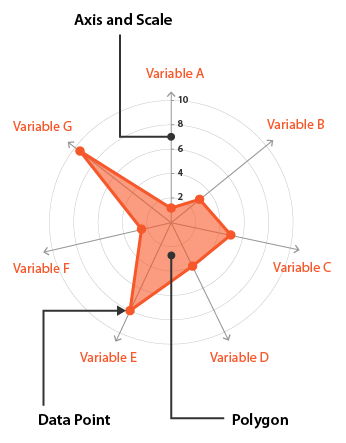


### Cuando utilizar
- Quiero comparar diversas variables numéricas de uno o más grupos de observaciones. También podemos comparar observaciones individuales. 


### Consejos
- Las variables comparadas tienen que (preferiblemente) tener una escala similar. O al menos, compartir la misma unidad de medición. De otro modo, el gráfico será dificil de interpretar.
- Si estoy comparando diversos grupos o observaciones apiladas en el mismo grafico, se puede volver ilegible. Una solución sería limitar los grupos, o hacer un Grafico Radar diferente por cada grupo en ves de apilarlos.
- De mismo modo, si tengo muchas variables, tambien se puede volver ilegible. También puedo aplicar la misma solución del punto anterior. Es decir, hacer un gráfico radar diferente para comparar otras variables.
- Es un gráfico con usos muy limitados ya que facilmente se vuelve complejo de entender. Y muy dificilmente vamos a tener muchas categorías comparables en un gráfico.

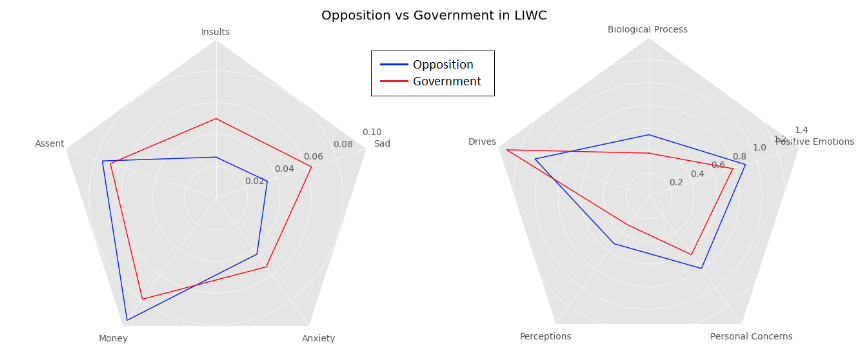


## En esta clase
### Datos
Información sobre especies de pinguinos
### Objetivos
1. Como se comparan las medidas de los pinguinos de diferentes especies

## Referencias
- https://datavizcatalogue.com/methods/radar_chart.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/pinguinos.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
# Eliminamos filas NaNs
df = df.dropna()

In [5]:
agrupado = df.groupby('species').mean()
agrupado

/var/folders/5q/75t4z1sd6vg5lq56p9vh1cgm0000gn/T/ipykernel_87839/3403408086.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupado = df.groupby('species').mean()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.542500,15.002500,217.233333,5090.625000


In [20]:
categorias = [
    'culmen_length_mm', 
    'culmen_depth_mm', 
    'flipper_length_mm',
    'body_mass_g'
]
adelie = list(agrupado.loc['Adelie', :])
chinstrap = list(agrupado.loc['Chinstrap', :])
gentoo = list(agrupado.loc['Gentoo', :])
categorias

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [21]:
# Radar Chart con Plotly
# https://plotly.com/python/radar-chart/
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=adelie,
      theta=categorias,
      fill='toself',
      name='Adelie'
))

fig.add_trace(go.Scatterpolar(
      r=chinstrap,
      theta=categorias,
      fill='toself',
      name='Chinstrap'
))

fig.add_trace(go.Scatterpolar(
      r=gentoo,
      theta=categorias,
      fill='toself',
      name='Gentoo'
))

fig.show()

In [31]:
# Podemos intentar NORMALIZAR nuestro dataset...
df2 = df[categorias]
df_norm = (df2-df2.min())/(df2.max()-df2.min())
df_norm['species'] = df['species']
df_norm

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,0.254545,0.666667,0.152542,0.291667,Adelie
1,0.269091,0.511905,0.237288,0.305556,Adelie
2,0.298182,0.583333,0.389831,0.152778,Adelie
4,0.167273,0.738095,0.355932,0.208333,Adelie
5,0.261818,0.892857,0.305085,0.263889,Adelie
...,...,...,...,...,...
338,0.549091,0.071429,0.711864,0.618056,Gentoo
340,0.534545,0.142857,0.728814,0.597222,Gentoo
341,0.665455,0.309524,0.847458,0.847222,Gentoo
342,0.476364,0.202381,0.677966,0.694444,Gentoo


In [32]:
agrupado_norm = df_norm.groupby('species').mean()
agrupado_norm

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,0.244508,0.624674,0.306826,0.279490
Chinstrap,0.608503,0.633403,0.403789,0.286969
Gentoo,0.561545,0.226488,0.766667,0.664062


In [33]:
adelie2 = list(agrupado_norm.loc['Adelie', :])
chinstrap2 = list(agrupado_norm.loc['Chinstrap', :])
gentoo2 = list(agrupado_norm.loc['Gentoo', :])

In [34]:
# Radar Chart con Plotly
# https://plotly.com/python/radar-chart/
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=adelie2,
      theta=categorias,
      fill='toself',
      name='Adelie'
))

fig.add_trace(go.Scatterpolar(
      r=chinstrap2,
      theta=categorias,
      fill='toself',
      name='Chinstrap'
))

fig.add_trace(go.Scatterpolar(
      r=gentoo2,
      theta=categorias,
      fill='toself',
      name='Gentoo'
))

fig.show()